In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (12,6)
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_excel('Data_cleaning_flipkart.xlsx')
df.head()

,Product.1,color,Memory in GB,Star_Rating,Ratings,Reviews,Offer_price,Market_Price,Discount,Discount_calculated
0,IAIR D40,not known,32.0,3.9,22,13,1319,1319,0.0,0.0
1,IAIR D22,not known,32.0,4.1,15,7,1120,1120,0.0,0.0
2,IAIR D24,not known,32.0,3.8,77,26,1128,1128,0.0,0.0
3,IAIR D41,not known,32.0,3.4,24,7,1319,1319,0.0,0.0
4,Good One 5026,not known,32.0,4.3,223,41,999,999,0.0,0.0


In [3]:
df.columns

Index(['Product.1', 'color', 'Memory in GB', 'Star_Rating', 'Ratings',
       'Reviews', 'Offer_price', 'Market_Price', 'Discount',
       'Discount_calculated'],
      dtype='object')

In [4]:
df.drop(columns=['Discount'],axis=1,inplace=True)

In [5]:
df.rename(columns={'Product.1':'Product','color':'Color'} , inplace=True)

In [6]:
df.head()

,Product,Color,Memory in GB,Star_Rating,Ratings,Reviews,Offer_price,Market_Price,Discount_calculated
0,IAIR D40,not known,32.0,3.9,22,13,1319,1319,0.0
1,IAIR D22,not known,32.0,4.1,15,7,1120,1120,0.0
2,IAIR D24,not known,32.0,3.8,77,26,1128,1128,0.0
3,IAIR D41,not known,32.0,3.4,24,7,1319,1319,0.0
4,Good One 5026,not known,32.0,4.3,223,41,999,999,0.0


In [7]:
print("Total no of records ",df.shape[0])
print("Total no of features ",df.shape[1])

Total no of records  641
Total no of features  9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product              641 non-null    object 
 1   Color                588 non-null    object 
 2   Memory in GB         585 non-null    float64
 3   Star_Rating          641 non-null    float64
 4   Ratings              641 non-null    int64  
 5   Reviews              641 non-null    int64  
 6   Offer_price          641 non-null    int64  
 7   Market_Price         641 non-null    int64  
 8   Discount_calculated  641 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 45.2+ KB


In [9]:
# filling null values with median

df["Memory in GB"]=df["Memory in GB"].fillna(df["Memory in GB"].median())

In [10]:
# changing its datatype to category
df[["Memory in GB","Star_Rating"]]=df[["Memory in GB","Star_Rating"]].astype('category')

In [11]:
df["Color"]=df["Color"].fillna("not known")

In [12]:
df.isnull().mean()*100

Product                0.0
Color                  0.0
Memory in GB           0.0
Star_Rating            0.0
Ratings                0.0
Reviews                0.0
Offer_price            0.0
Market_Price           0.0
Discount_calculated    0.0
dtype: float64

In [13]:
df.describe()

,Ratings,Reviews,Offer_price,Market_Price,Discount_calculated
count,641.000000,641.000000,641.000000,641.000000,641.000000
mean,27690.330733,2025.892356,14847.915757,17717.352574,13.465481
std,54829.322467,3851.286008,15213.918916,17154.614612,12.766978
min,4.000000,0.000000,719.000000,749.000000,0.000000
25%,858.000000,88.000000,6629.000000,7889.000000,0.000000
50%,5938.000000,473.000000,12249.000000,15607.000000,13.158587
75%,25214.000000,2102.000000,16999.000000,20999.000000,24.000960
max,476716.000000,34621.000000,139900.000000,139900.000000,60.024010


- <h4> Univariate analysis

In [14]:
# categorical features


128.0    251
64.0     216
32.0     139
256.0     34
16.0       1
Name: Memory in GB, dtype: int64

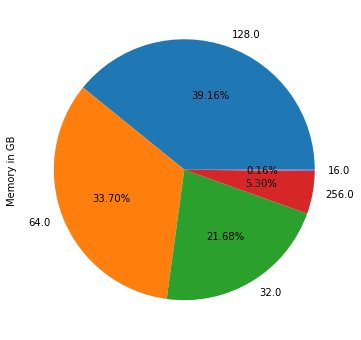

In [15]:
# Memory in GB
# plt.figure(figsize=(6,6))
df["Memory in GB"].value_counts().plot(kind='pie' ,autopct = '%0.2f%%')
df["Memory in GB"].value_counts()

<AxesSubplot:>

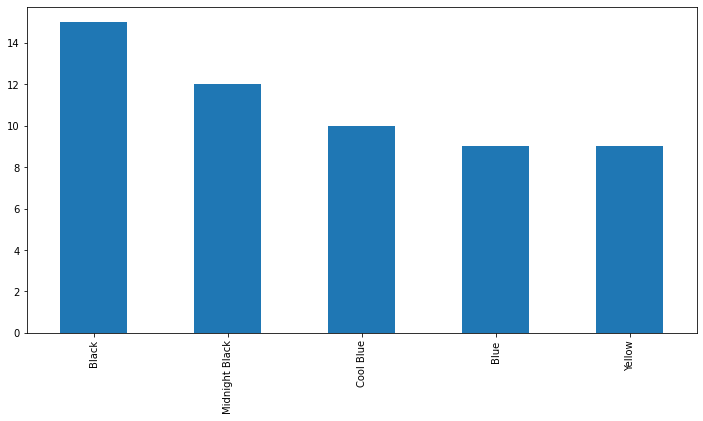

In [16]:
# plt.figure(figsize=(10,6))
x=df.Color.value_counts().head(6)
x[1:].plot(kind="bar")

- <h4> Fav color is Black 

<AxesSubplot:>

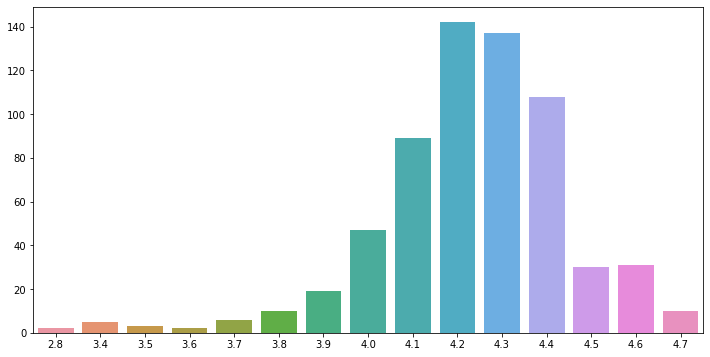

In [17]:
# top 5 ratings
# plt.figure(figsize=(10,6))
x=df['Star_Rating'].value_counts()
val=x.values
idx=x.index

sns.barplot(x=idx,y=val)

- <h4>  142 products got 4.2 star ratings

<AxesSubplot:xlabel='prices', ylabel='Density'>

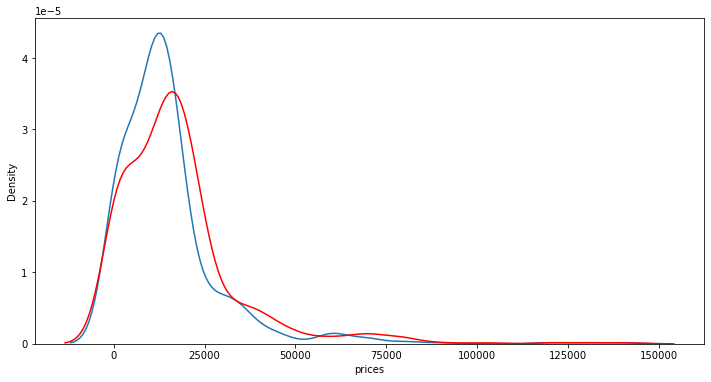

In [41]:
sns.distplot(df['Offer_price'],kde=True ,hist=False )
sns.distplot(df['Market_Price'],kde=True , color = "red",hist=False ,axlabel="prices")



In [42]:
# maximun of mobiles are in range of 20000

In [43]:
df["Offer_price"].mean()

14847.915756630266

In [44]:
df["Market_Price"].mean()

17717.352574102963

In [48]:
((df["Market_Price"].mean())-(df["Offer_price"].mean()))*100/(df["Market_Price"].mean())

16.195629710879523

- <h4> average discount offered on mobiles is 16.19%

In [50]:
df["Discount_calculated"].mean()

13.465481461807284

##### their is a 2% deviation in disounts

In [54]:
df.groupby("Product").count()["Color"]

Product
APPLE iPhone 11         8
APPLE iPhone 12         2
APPLE iPhone 12 Mini    3
APPLE iPhone 13         9
APPLE iPhone 13 Mini    1
                       ..
vivo Y21T               2
vivo Y22                1
vivo Y31                1
vivo Y33s               1
vivo Y75                1
Name: Color, Length: 286, dtype: int64

### there are 286 products

In [60]:
df.groupby("Product").max("Star_Rating")

,Ratings,Reviews,Offer_price,Market_Price,Discount_calculated
Product,,,,,
APPLE iPhone 11,131081,8323,42990,48900,18.018223
APPLE iPhone 12,183329,12537,60990,64900,6.024653
APPLE iPhone 12 Mini,109474,8759,46990,64900,33.238731
APPLE iPhone 13,98089,4870,69990,79900,14.177396
APPLE iPhone 13 Mini,2473,217,68990,74900,7.890521
...,...,...,...,...,...
vivo Y21T,1245,90,15499,19990,22.466233
vivo Y22,21,0,14499,17990,19.405225
vivo Y31,8535,601,20490,20490,0.000000


In [65]:

df1 = pd.DataFrame(columns = df.columns)
df1

,Product,Color,Memory in GB,Star_Rating,Ratings,Reviews,Offer_price,Market_Price,Discount_calculated


In [66]:
for prod, data in df.groupby("Product"):
    highest_revenue_in_city = data.nlargest(1, "Offer_price")
    df1 = df1.append(highest_revenue_in_city)

In [67]:
df1

,Product,Color,Memory in GB,Star_Rating,Ratings,Reviews,Offer_price,Market_Price,Discount_calculated
293,APPLE iPhone 11,Green,128.0,4.6,130995,8302,42990,48900,12.085890
629,APPLE iPhone 12,Black,128.0,4.6,183329,12537,60990,64900,6.024653
447,APPLE iPhone 12 Mini,White,128.0,4.5,109424,8752,46990,64900,27.596302
519,APPLE iPhone 13,Pink,256.0,4.7,79146,3488,69990,79900,12.403004
621,APPLE iPhone 13 Mini,Starlight,256.0,4.5,2473,217,68990,74900,7.890521
...,...,...,...,...,...,...,...,...,...
516,vivo Y21T,Pearl White,128.0,4.4,1245,90,15499,19990,22.466233
551,vivo Y22,Starlit Blue,64.0,4.0,21,0,14499,17990,19.405225
194,vivo Y31,Racing Black,128.0,4.4,8535,601,20490,20490,0.000000
630,vivo Y33s,Mirror Black,128.0,4.3,11908,1088,17989,17990,0.005559


In [ ]:
# mean ratings and reviews for products

In [77]:
df.groupby("Product").agg({ "Ratings" : "mean" , 'Reviews': 'mean' })

,Ratings,Reviews
Product,,
APPLE iPhone 11,131044.875000,8311.750000
APPLE iPhone 12,183329.000000,12537.000000
APPLE iPhone 12 Mini,109445.333333,8754.666667
APPLE iPhone 13,83355.555556,3795.111111
APPLE iPhone 13 Mini,2473.000000,217.000000
...,...,...
vivo Y21T,1245.000000,90.000000
vivo Y22,21.000000,0.000000
vivo Y31,8535.000000,601.000000


In [86]:
# filltering all apple products
x=df.groupby("Product").agg({ "Ratings" : "mean" , 'Reviews': 'mean' }).reset_index()
x[x.Product.str.contains("APPLE")]

,Product,Ratings,Reviews
0,APPLE iPhone 11,131044.875000,8311.750000
1,APPLE iPhone 12,183329.000000,12537.000000
2,APPLE iPhone 12 Mini,109445.333333,8754.666667
3,APPLE iPhone 13,83355.555556,3795.111111
4,APPLE iPhone 13 Mini,2473.000000,217.000000
5,APPLE iPhone 13 Pro,977.000000,87.000000
6,APPLE iPhone 13 Pro Max,1486.000000,152.000000
7,APPLE iPhone 14,181.000000,7.333333


In [87]:
# filltering all apple products
x=df.groupby("Product").agg({ "Offer_price" : "mean" , 'Market_Price': 'mean' }).reset_index()
x[x.Product.str.contains("APPLE")]

,Product,Offer_price,Market_Price
0,APPLE iPhone 11,38990.000000,46400.000000
1,APPLE iPhone 12,60990.000000,64900.000000
2,APPLE iPhone 12 Mini,42323.333333,61566.666667
3,APPLE iPhone 13,63212.222222,73233.333333
4,APPLE iPhone 13 Mini,68990.000000,74900.000000
5,APPLE iPhone 13 Pro,124900.000000,124900.000000
6,APPLE iPhone 13 Pro Max,139900.000000,139900.000000
7,APPLE iPhone 14,83233.333333,83233.333333


In [92]:
top7apple = x[x.Product.str.contains("APPLE")]
top7apple

,Product,Offer_price,Market_Price
0,APPLE iPhone 11,38990.000000,46400.000000
1,APPLE iPhone 12,60990.000000,64900.000000
2,APPLE iPhone 12 Mini,42323.333333,61566.666667
3,APPLE iPhone 13,63212.222222,73233.333333
4,APPLE iPhone 13 Mini,68990.000000,74900.000000
5,APPLE iPhone 13 Pro,124900.000000,124900.000000
6,APPLE iPhone 13 Pro Max,139900.000000,139900.000000
7,APPLE iPhone 14,83233.333333,83233.333333


<AxesSubplot:xlabel='Product', ylabel='Offer_price'>

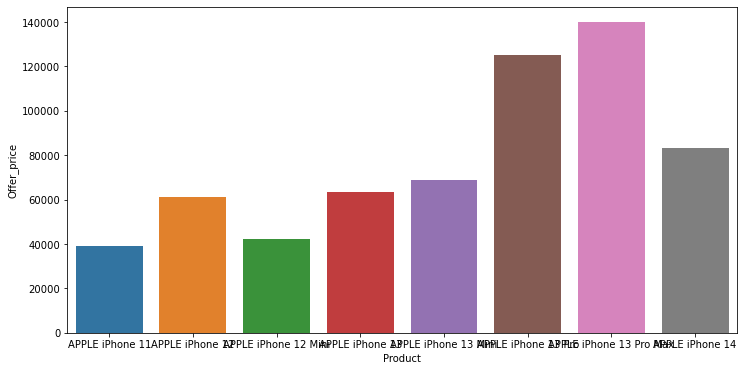

In [101]:
sns.barplot(data=top7apple ,x="Product",y="Offer_price" )

- <h4> APPLE iPhone 13 Pro Max is most costliest iphone

In [105]:
df[df['Product']=="APPLE iPhone 13 Pro Max"]

,Product,Color,Memory in GB,Star_Rating,Ratings,Reviews,Offer_price,Market_Price,Discount_calculated
198,APPLE iPhone 13 Pro Max,Alpine Green,256.0,4.6,1486,152,139900,139900,0.0


- <h2> APPLE iPhone 13 Pro Max has got Star_Rating of 4.6  with 256 GB Memory